# Sandbox

Notebook for creating/testing/improving code

In [1]:
from global_variables.importer import *
import time

Project root was set to C:/Users/Max Moons/Documents/GitHub/OSRS-Trade-Ledger/py/
loading data from rbpi
Setting up RealtimePricesSnapshot class (allow_rbpi_download=True)...
Setting up ItemWikiMapping...
global_variables importer setup time: 520.1ms


In [2]:
import sqlite3
import global_variables.path as gp
import global_variables.osrs as go
import util.unix_time as ut
import global_variables.variables as var
import global_variables.values as gv
from model.database import Database as Db

con = sqlite3.connect(database=f"file:{gp.f_db_timeseries}?mode=ro", uri=True)

In [3]:
con_contents = Db.get_tables(con)

('table', 'realtime', 'realtime', 2, 'CREATE TABLE "realtime" ("item_id" INTEGER NOT NULL,"timestamp"\tINTEGER NOT NULL,"is_buy" INTEGER NOT NULL, "price" INTEGER, PRIMARY KEY(item_id, timestamp, is_buy), CONSTRAINT "fk_r_idb" FOREIGN KEY (item_id) REFERENCES itemdb(item_id) )')
('index', 'sqlite_autoindex_realtime_1', 'realtime', 3, None)
('table', 'avg5m', 'avg5m', 4, 'CREATE TABLE "avg5m"("item_id" INTEGER NOT NULL, "timestamp" INTEGER NOT NULL, "buy_price" INTEGER NOT NULL DEFAULT 0, "buy_volume" INTEGER NOT NULL DEFAULT 0, "sell_price" INTEGER NOT NULL DEFAULT 0, "sell_volume" INTEGER NOT NULL DEFAULT 0, PRIMARY KEY(timestamp, item_id) )')
('index', 'sqlite_autoindex_avg5m_1', 'avg5m', 5, None)
('table', 'realtime_', 'realtime_', 6, 'CREATE TABLE "realtime_"("item_id" INTEGER NOT NULL, "timestamp" INTEGER NOT NULL, "is_buy" INTEGER NOT NULL, "price" INTEGER NOT NULL DEFAULT 0, PRIMARY KEY(timestamp, item_id, is_buy) )')
('index', 'sqlite_autoindex_realtime__1', 'realtime_', 7, Non

In [5]:
non_tables = [c for c in con_contents if c[0] != 'table']
for el in non_tables:
    print(el)
con.close()

('index', 'sqlite_autoindex_realtime_1', 'realtime', 3, None)
('index', 'sqlite_autoindex_avg5m_1', 'avg5m', 5, None)
('index', 'sqlite_autoindex_realtime__1', 'realtime_', 7, None)
('index', 'sqlite_autoindex_wiki_1', 'wiki', 9, None)
('index', 'index_wiki_item', 'wiki', 10, 'CREATE INDEX "index_wiki_item" ON "wiki" (item_id)')
('index', 'index_realtime_item', 'avg5m', 11, 'CREATE INDEX "index_realtime_item" ON "avg5m" (item_id) ')


In [6]:
con = sqlite3.connect(gp.f_db_timeseries)
con.execute("DROP INDEX 'index_wiki_item'")
con.execute("DROP INDEX 'index_realtime_item'")
con.commit()
con.close()

In [6]:
league_3_t0 = dt_to_ts(datetime.datetime(2022, 1, 19))
league_3_t1 = dt_to_ts(datetime.datetime(2022, 3, 16))
t0 = league_3_t0 - 86400 * 30
t1 = league_3_t1 + 86400 * 14
n_rows = (ts_to_dt(t1)-ts_to_dt(t0)).days
print(n_rows, 'days')

100 days


In [6]:
from data_transfer import update_npy_arrays
from globals import item_ids
from data_analysis import analysis_24h
# update_npy_arrays(id_list=item_ids, force_update=True, min_timestamp=t0, max_timestamp=t1)

In [5]:
test_file = path.dir_np_archive_league_III + '00002.npy'

columns = load_data(path.dir_np_archive_league_III+'np_columns.dat')
item = NpyArray(item_id=2, npy_dir=path.dir_np_archive_league_III)
print(ts_to_dt(min(item.timestamp)))

2021-12-20 00:00:00


In [19]:
import os
import shutil
import time
from path import get_file_names

rbpi_wd = '//RASPBERRYPI/sharethepi/ge_scraper/'

In [5]:
files = get_file_names(rbpi_wd)

print(files)
files_new = [int(os.path.getctime(rbpi_wd+f)) for f in files]
for new_file, file in zip(files_new, files):
    pass

['1701720666.npy', '1701734773.npy', '1701740165.npy', '1701749172.npy', '1701749465.npy', '1701763572.npy', '1701763865.npy', '1701777970.npy', '1701778266.npy', '1701792372.npy', '1701792665.npy', '1701806772.npy', '1701807066.npy', 'batch_001.npy', 'batch_002.npy', 'batch_003.npy', 'batch_004.npy', 'batch_005.npy', 'batch_006.npy', 'batch_007.npy', 'batch_008.npy', 'batch_009.npy', 'batch_010.npy', 'batch_011.npy', 'batch_012.npy', 'batch_013.npy', 'batch_014.npy', 'batch_015.npy', 'batch_016.npy', 'batch_017.npy', 'batch_018.npy', 'batch_019.npy', 'batch_020.npy', 'batch_021.npy']


FileExistsError: [WinError 183] Cannot create a file when that file already exists: '//RASPBERRYPI/sharethepi/ge_scraper/npy/batches/batch_021.npy' -> '//RASPBERRYPI/sharethepi/ge_scraper/npy/batches/1701731846.npy'

In [8]:
wd_str = os.getcwd().replace('\\', '/')
print(f"'{wd_str}'")

'C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger'


In [78]:





# to_dir = rbpi_wd + zip_file[len(wd):]
# print(f'Transferring {zip_file} to {to_dir}...')
# t0 = time.time()
# shutil.copy(zip_file, to_dir)
# print(f'Time taken to transfer file from {zip_file} to {to_dir}: {time.time()-t0:.1f} seconds')
#
# os.remove(zip_file)
#
# print(f'Transferring {to_dir} to {zip_file}...')
# t0 = time.time()
# shutil.copy(to_dir, zip_file)
# print(f'Time taken to transfer file from {to_dir} to {zip_file}: {time.time()-t0:.1f} seconds')


C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/temp/charlies_inferno_adventures.csv
txt C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/temp_zip_dir/inferno/2023-05-01 15-20-03 Failed KC on Wave 13, Splits.txt
fname ['2023-05-01 15-20-03 Failed KC on Wave 13, Splits', 'txt']
['11:57', '11:57']
11:57
exporting csv to C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/temp/charlies_inferno_adventures.csv
txt C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/temp_zip_dir/inferno/2023-05-01 15-51-34 Failed KC on Wave 15, Splits.txt
fname ['2023-05-01 15-51-34 Failed KC on Wave 15, Splits', 'txt']
['08:06', '08:06']
08:06
exporting csv to C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/temp/charlies_inferno_adventures.csv
txt C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/temp_zip_dir/inferno/2023-05-01 17-00-21 Failed KC on Wave 24, Splits.txt
fname ['2023-05-01 17-00-21 Failed KC on Wave 24, Splits', 'txt']
['07:15', '07:15']
['22:39', '15:24']
07:15
15:24
exporting csv to 

In [4]:
list_a = [1, 2, 3, 4]
list_b = [3, 4, 5, 6]
print(frozenset(list_a).intersection(list_b))

frozenset({3, 4})


In [15]:
from path import get_file_names
from str_formats import format_n
import os
for d, e in zip(['league_plots_11_12/', 'league_plots_11_12_jpg/'], ['png', 'jpeg']):
    files = get_file_names(src=d, add_src=True, extensions=[e])
    print(e, f"{len(files)} files", format_n(sum([os.path.getsize(f) for f in files]))+'b')

png 101 files 21.487Mb
jpeg 101 files 19.858Mb


updating prices...
updated realtime prices
[00h00m00s] Processed 0/1025 items with 0 skips and 0 errors
[00h00m41s] Processed 50/1025 items with 0 skips and 0 errors
[00h01m27s] Processed 100/1025 items with 0 skips and 0 errors
[00h02m32s] Processed 150/1025 items with 0 skips and 0 errors
[00h03m37s] Processed 200/1025 items with 0 skips and 0 errors
[00h04m38s] Processed 250/1025 items with 0 skips and 0 errors
[00h05m40s] Processed 300/1025 items with 0 skips and 0 errors
[00h06m41s] Processed 350/1025 items with 0 skips and 0 errors
[00h07m44s] Processed 400/1025 items with 0 skips and 0 errors
[00h08m45s] Processed 450/1025 items with 0 skips and 0 errors
[00h09m39s] Processed 500/1025 items with 0 skips and 0 errors
[00h10m35s] Processed 550/1025 items with 0 skips and 0 errors
[00h11m30s] Processed 600/1025 items with 0 skips and 0 errors
[00h12m21s] Processed 650/1025 items with 0 skips and 0 errors
[00h13m12s] Processed 700/1025 items with 0 skips and 0 errors
[00h13m55s] Pro

ValueError: min() arg is an empty sequence

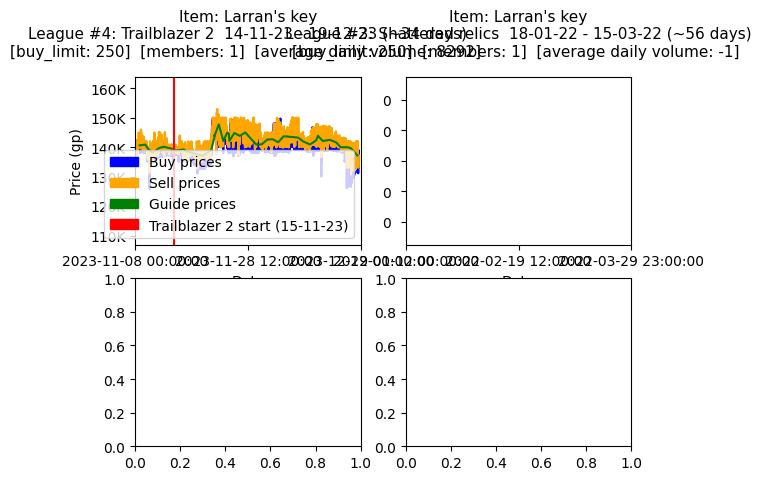

In [1]:
from generate_leagues_graphs import generate_graphs
generate_graphs()

In [4]:
print(time.time(), datetime.datetime.now(tz=datetime.timezone(datetime.timedelta(hours=0)))-datetime.timedelta(seconds=int(time.time())))

1714788652.121249 1970-01-01 00:00:00.121248+00:00


In [34]:
n = 1000000

my_dt = loc_dtn()
test_method(loc_dt_unix, n_exe=n, dt=my_dt)
test_method(loc_dt_unix_2, n_exe=n, dt=my_dt)
test_method(loc_dt_unix_3, n_exe=n, dt=my_dt)


N: 1000000 Time taken: 858.8ms
N: 1000000 Time taken: 370.4ms
N: 1000000 Time taken: 479.2ms


In [2]:
from util.file import get_files

for f in get_files(src='C:/Users/Max Moons/Documents/GitHub/OSRS-GE-Ledger/', ext=['py'], full_path=False):
    print(f)

code_improvement.py
database.py
data_analysis.py
data_download.py
data_preprocessing.py
data_transfer.py
data_visualization.py
filter.py
generate_leagues_graphs.py
ge_util.py
global_values.py
graphs.py
graph_util.py
gui.py
gui_backend.py
gui_formats.py
gui_graph.py
gui_objects.py
gui_tab_inventory.py
gui_tab_settings.py
inventory.py
ledger.py
local_files.py
main.py
manual_scripts.py
merge_inferno_logs.py
model_item.py
node_parser.py
obsidian_generator.py
path.py
resources.py
runelite_reader.py
sandbox.py
scheduled_data_transfer.py
setup_local_files.py
str_formats.py
threaded_tasks.py
transaction.py
transaction_parser.py
ts_util.py


In [1]:
import sqlite3
import global_variables.path as gp
from controller.item import ItemController, Item

idb = ItemController()

con_to = sqlite3.connect(gp.f_db_local)
for i in idb.all_items():
    if isinstance(i, Item):
        sql, row = i.insert_into_db(replace=True)
        con_to.execute(sql, row)

con_to.commit()


Project root was set to C:/Users/Max Moons/Documents/GitHub/OSRS-Trade-Ledger/py/
loading data from rbpi
Setting up RealtimePricesSnapshot class (allow_rbpi_download=True)...
Setting up ItemWikiMapping...
global_variables importer setup time: 501.0ms
SELECT * FROM itemdb 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ඞ


In [6]:
print(chr(sum(range(ord(min(str(not())))))))

ඞ
